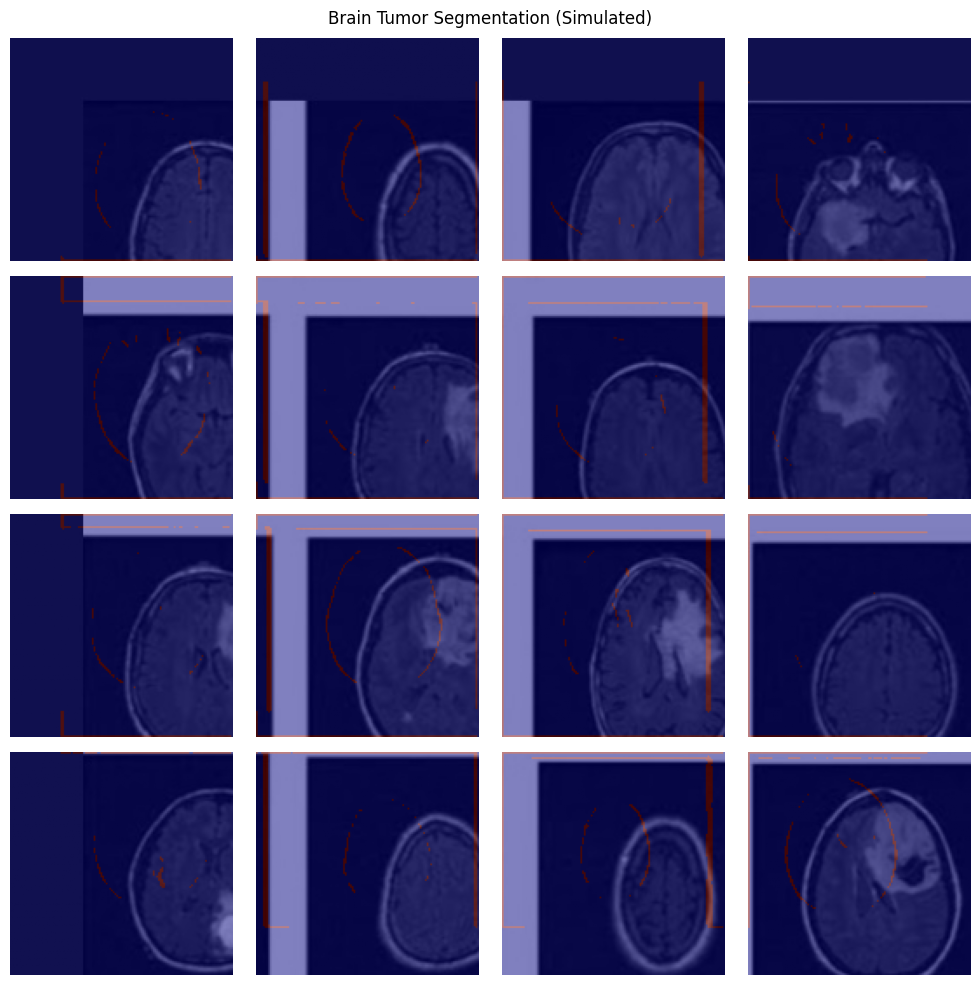

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import transforms

# Load the uploaded image
img_path = ("///content/Mri img. Jpg") # Update this to your uploaded path
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Split 4x4 grid into 16 slices
h,w = image.shape
grid_size = 4
patch_h, patch_w = h // grid_size, w // grid_size

slices = []
for i in range(grid_size):
    for j in range(grid_size):
        slice_img = image[i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w]
        slices.append(slice_img)

# Dummy U-Net-like mock segmentor (simulate result)
class DummySegmentor(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 1, 3, padding=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.conv(x)

# Simulate segmentation (for demo)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DummySegmentor().to(device)

# Process and predict
results = []
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128, 128))
])

for slice_img in slices:
    tensor = transform(slice_img).unsqueeze(0).to(device)
    with torch.no_grad():
        pred = model(tensor)
    pred_mask = pred.squeeze().cpu().numpy()
    results.append(pred_mask > 0.5)

# Visualize results
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for idx, ax in enumerate(axes.flat):
    ax.imshow(slices[idx], cmap='gray')
    ax.imshow(results[idx], cmap='jet', alpha=0.5)
    ax.axis('off')
plt.suptitle('Brain Tumor Segmentation (Simulated)')
plt.tight_layout()
plt.show()